In [156]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [157]:
# import data
df= pd.read_csv('./churn.csv') 

In [158]:
# Display the first few rows of the DataFrame to inspect the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [159]:
# Display the last few rows of the dataframe
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [160]:
# Drop unwanted columns: RowNumber, CustomerId, Surname
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [161]:
# Check the shape of the DataFrame after dropping unwanted columns
df.shape

(10000, 11)

In [162]:
# Display the columns
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [163]:
# Display summary statistics of the numerical columns in the DataFrame
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [164]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [165]:
# Check for missing values in the DataFrame
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [166]:
# Display the data types of each column in the DataFrame
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [167]:
# Print the number of unique values in each column
print('Number of unique values in each column:')
for label in df.columns:
        print(f'{label}: {df[label].nunique()}')

Number of unique values in each column:
CreditScore: 460
Geography: 3
Gender: 2
Age: 70
Tenure: 11
Balance: 6382
NumOfProducts: 4
HasCrCard: 2
IsActiveMember: 2
EstimatedSalary: 9999
Exited: 2


In [168]:
# Display the count of unique values in the 'NumOfProducts' column
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [169]:
# Display descriptive statistics for categorical columns
df.describe(include=['O'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


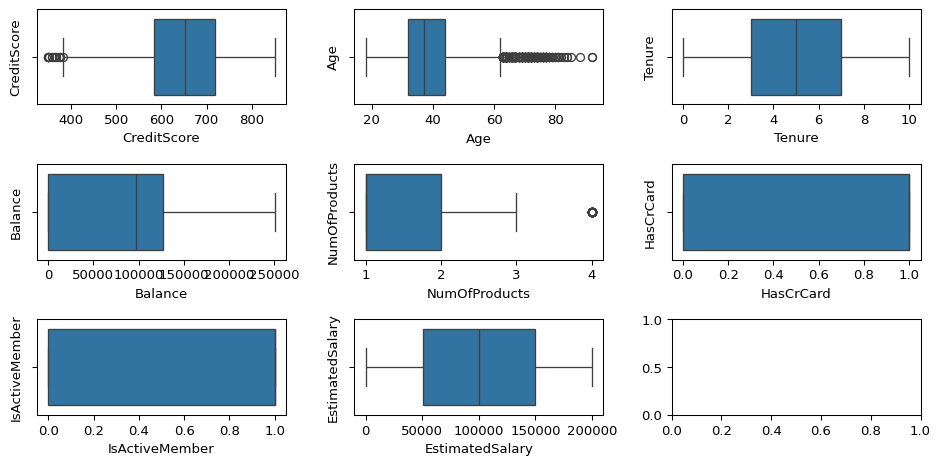

In [170]:
# Create subplots for box plots
fig, axs = plt.subplots(3, 3, dpi=95, figsize=(10, 5))

# Specify the columns you want to plot
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Use seaborn's boxplot function
for i, col in enumerate(columns_to_plot):
    row, col_in_subplot = divmod(i, 3)
    sns.boxplot(x=df[col], ax=axs[row, col_in_subplot], orient='h')  # 'h' for horizontal orientation
    axs[row, col_in_subplot].set_ylabel(col)

plt.tight_layout()
plt.show()

In [171]:
# Remove outliers using IQR method for specified columns
for col in ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']:
    # Calculate the IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [172]:
# Display the shape of the DataFrame after removing outliers
df.shape

(9568, 11)

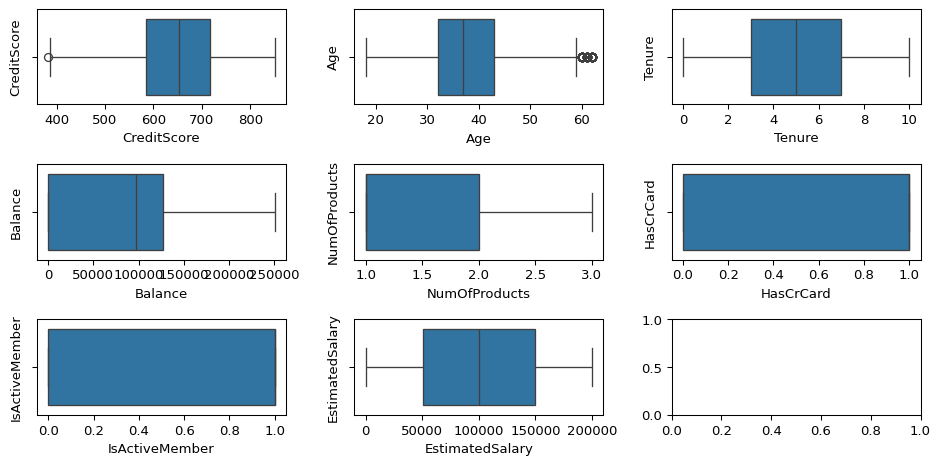

In [173]:
# Display boxplots for selected columns after removing outliers
fig, axs = plt.subplots(3, 3, dpi=95, figsize=(10, 5))

columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

for i, col in enumerate(columns_to_plot):
    row, col_in_subplot = divmod(i, 3)
    sns.boxplot(x=df[col], ax=axs[row, col_in_subplot], orient='h')  # 'h' for horizontal orientation
    axs[row, col_in_subplot].set_ylabel(col)

plt.tight_layout()
plt.show()

In [174]:
# Standardize selected numerical columns using StandardScaler
scaler = StandardScaler()
for col in ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']:
    df[col] = scaler.fit_transform(df[[col]])

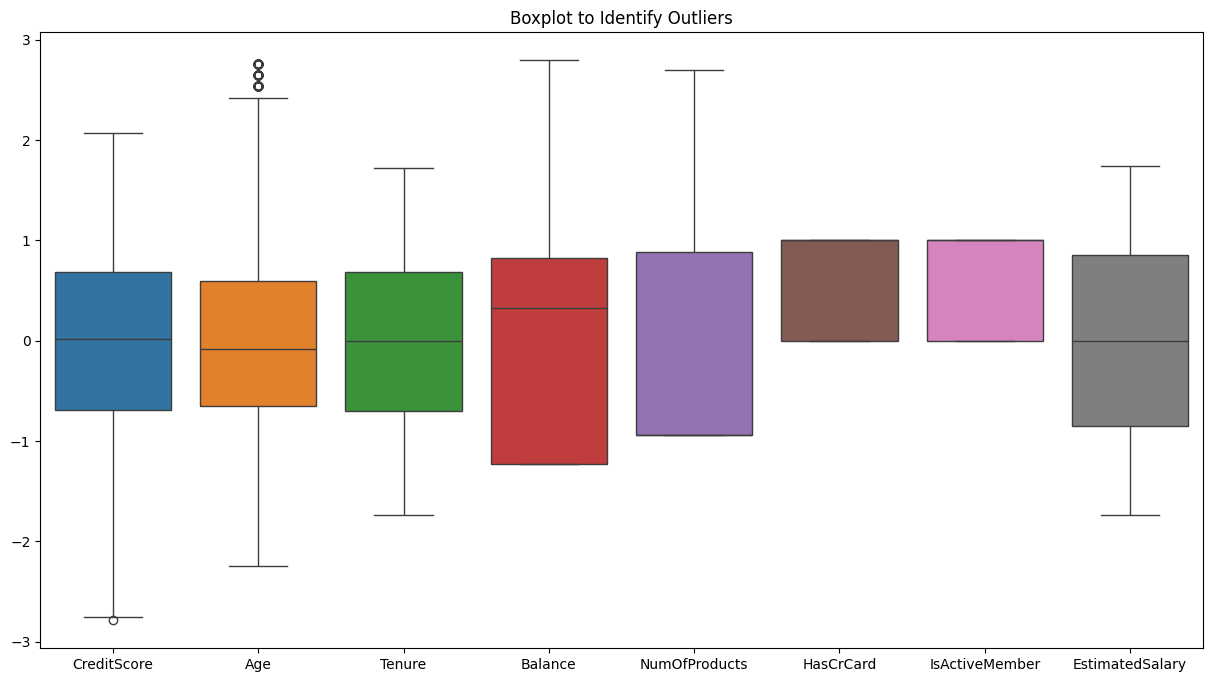

In [175]:
# Boxplot to identify outliers in selected columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])
plt.title('Boxplot to Identify Outliers')
plt.show()

# EDA

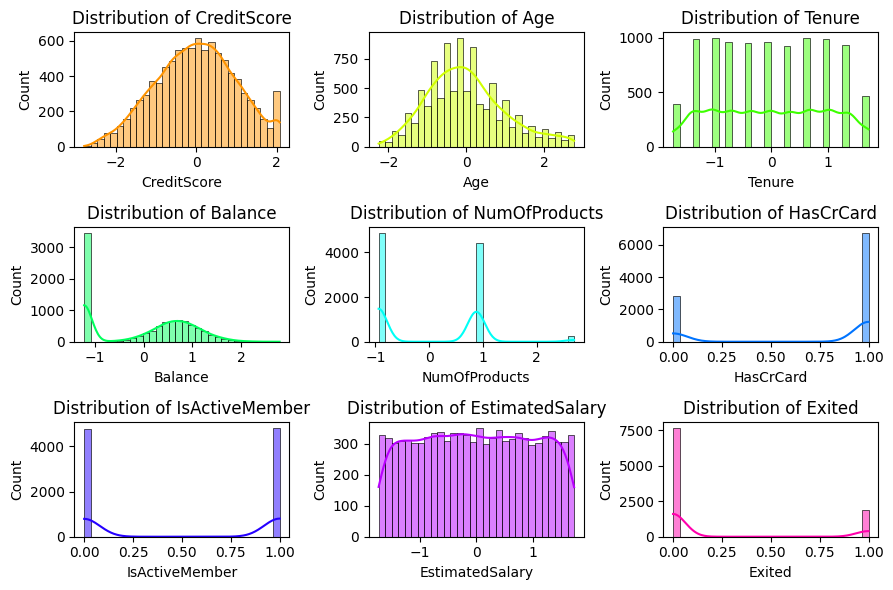

In [176]:
# Representing the distribution of the numerical columns
num_vars = df.select_dtypes(include='number').columns

palette = sns.color_palette("hsv", len(num_vars))

fig, axes = plt.subplots(3, 3, figsize=(9, 6))

for ax, var, color in zip(axes.flatten(), num_vars, palette):
    sns.histplot(df[var], bins=30, color=color, kde=True, ax=ax)
    ax.set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

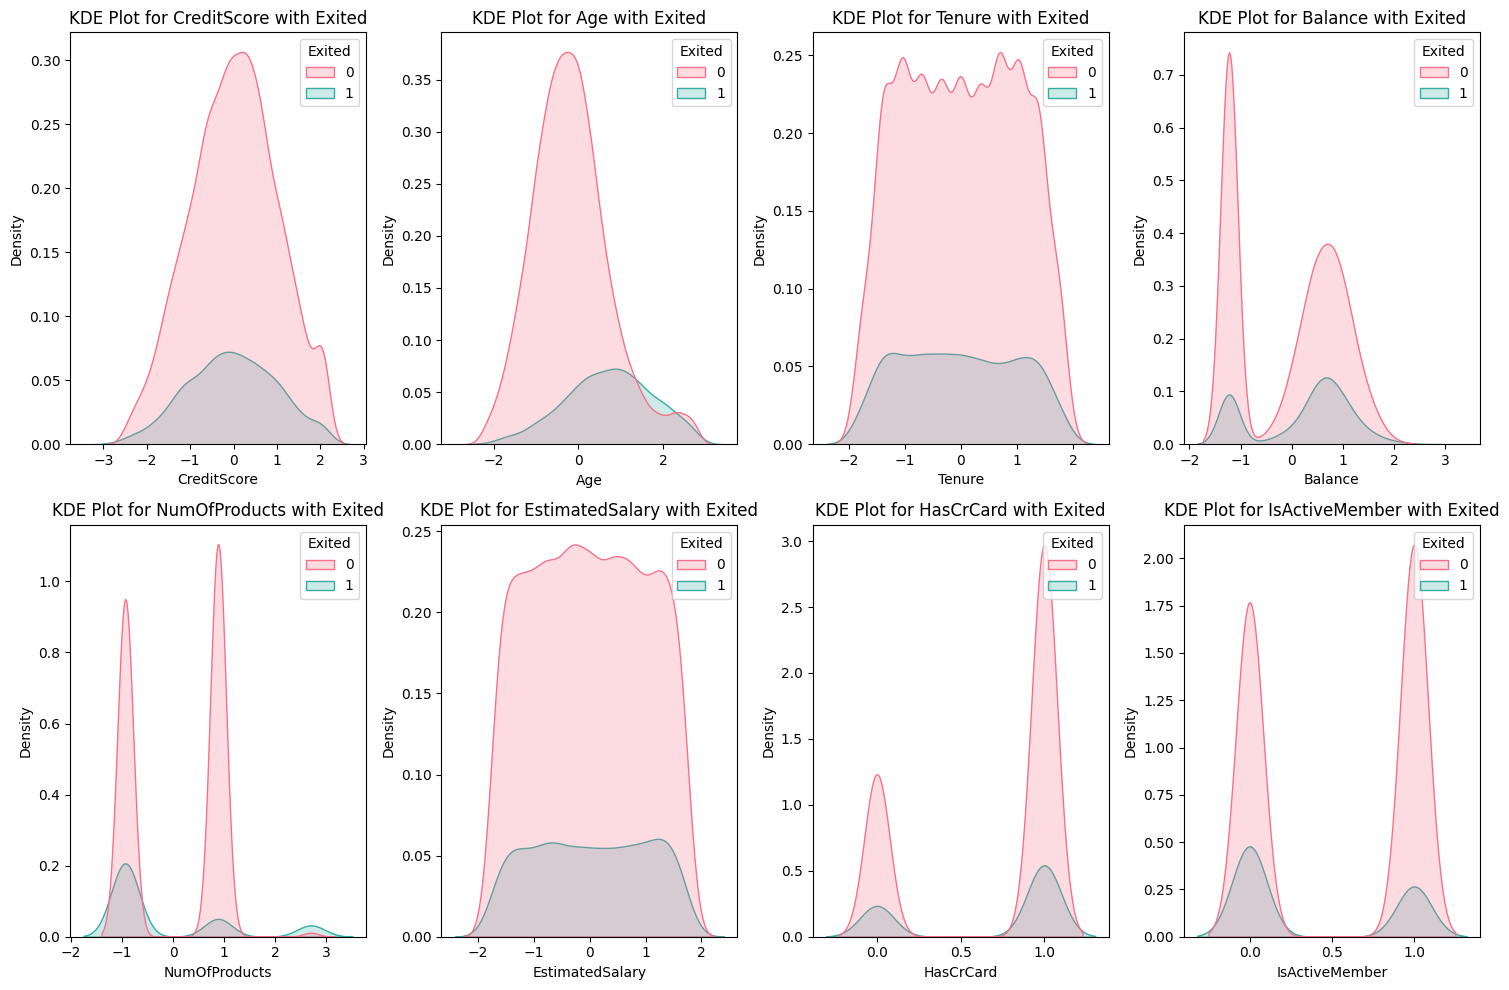

In [177]:
# Kernal Density Estimation (KDE) plot for selected numerical columns
features = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary','HasCrCard', 'IsActiveMember']

palette = sns.color_palette("hsv", len(features))

fig, axes = plt.subplots(2, 4, figsize=(15, 10))

axes = axes.flatten()


for ax, feature, color in zip(axes, features, palette):
    # Plot a KDE plot with 'Exited' as hue
    sns.kdeplot(data=df, x=feature, hue='Exited', fill=True, ax=ax, palette="husl")
    ax.set_title(f'KDE Plot for {feature} with Exited')

plt.tight_layout()

plt.show()

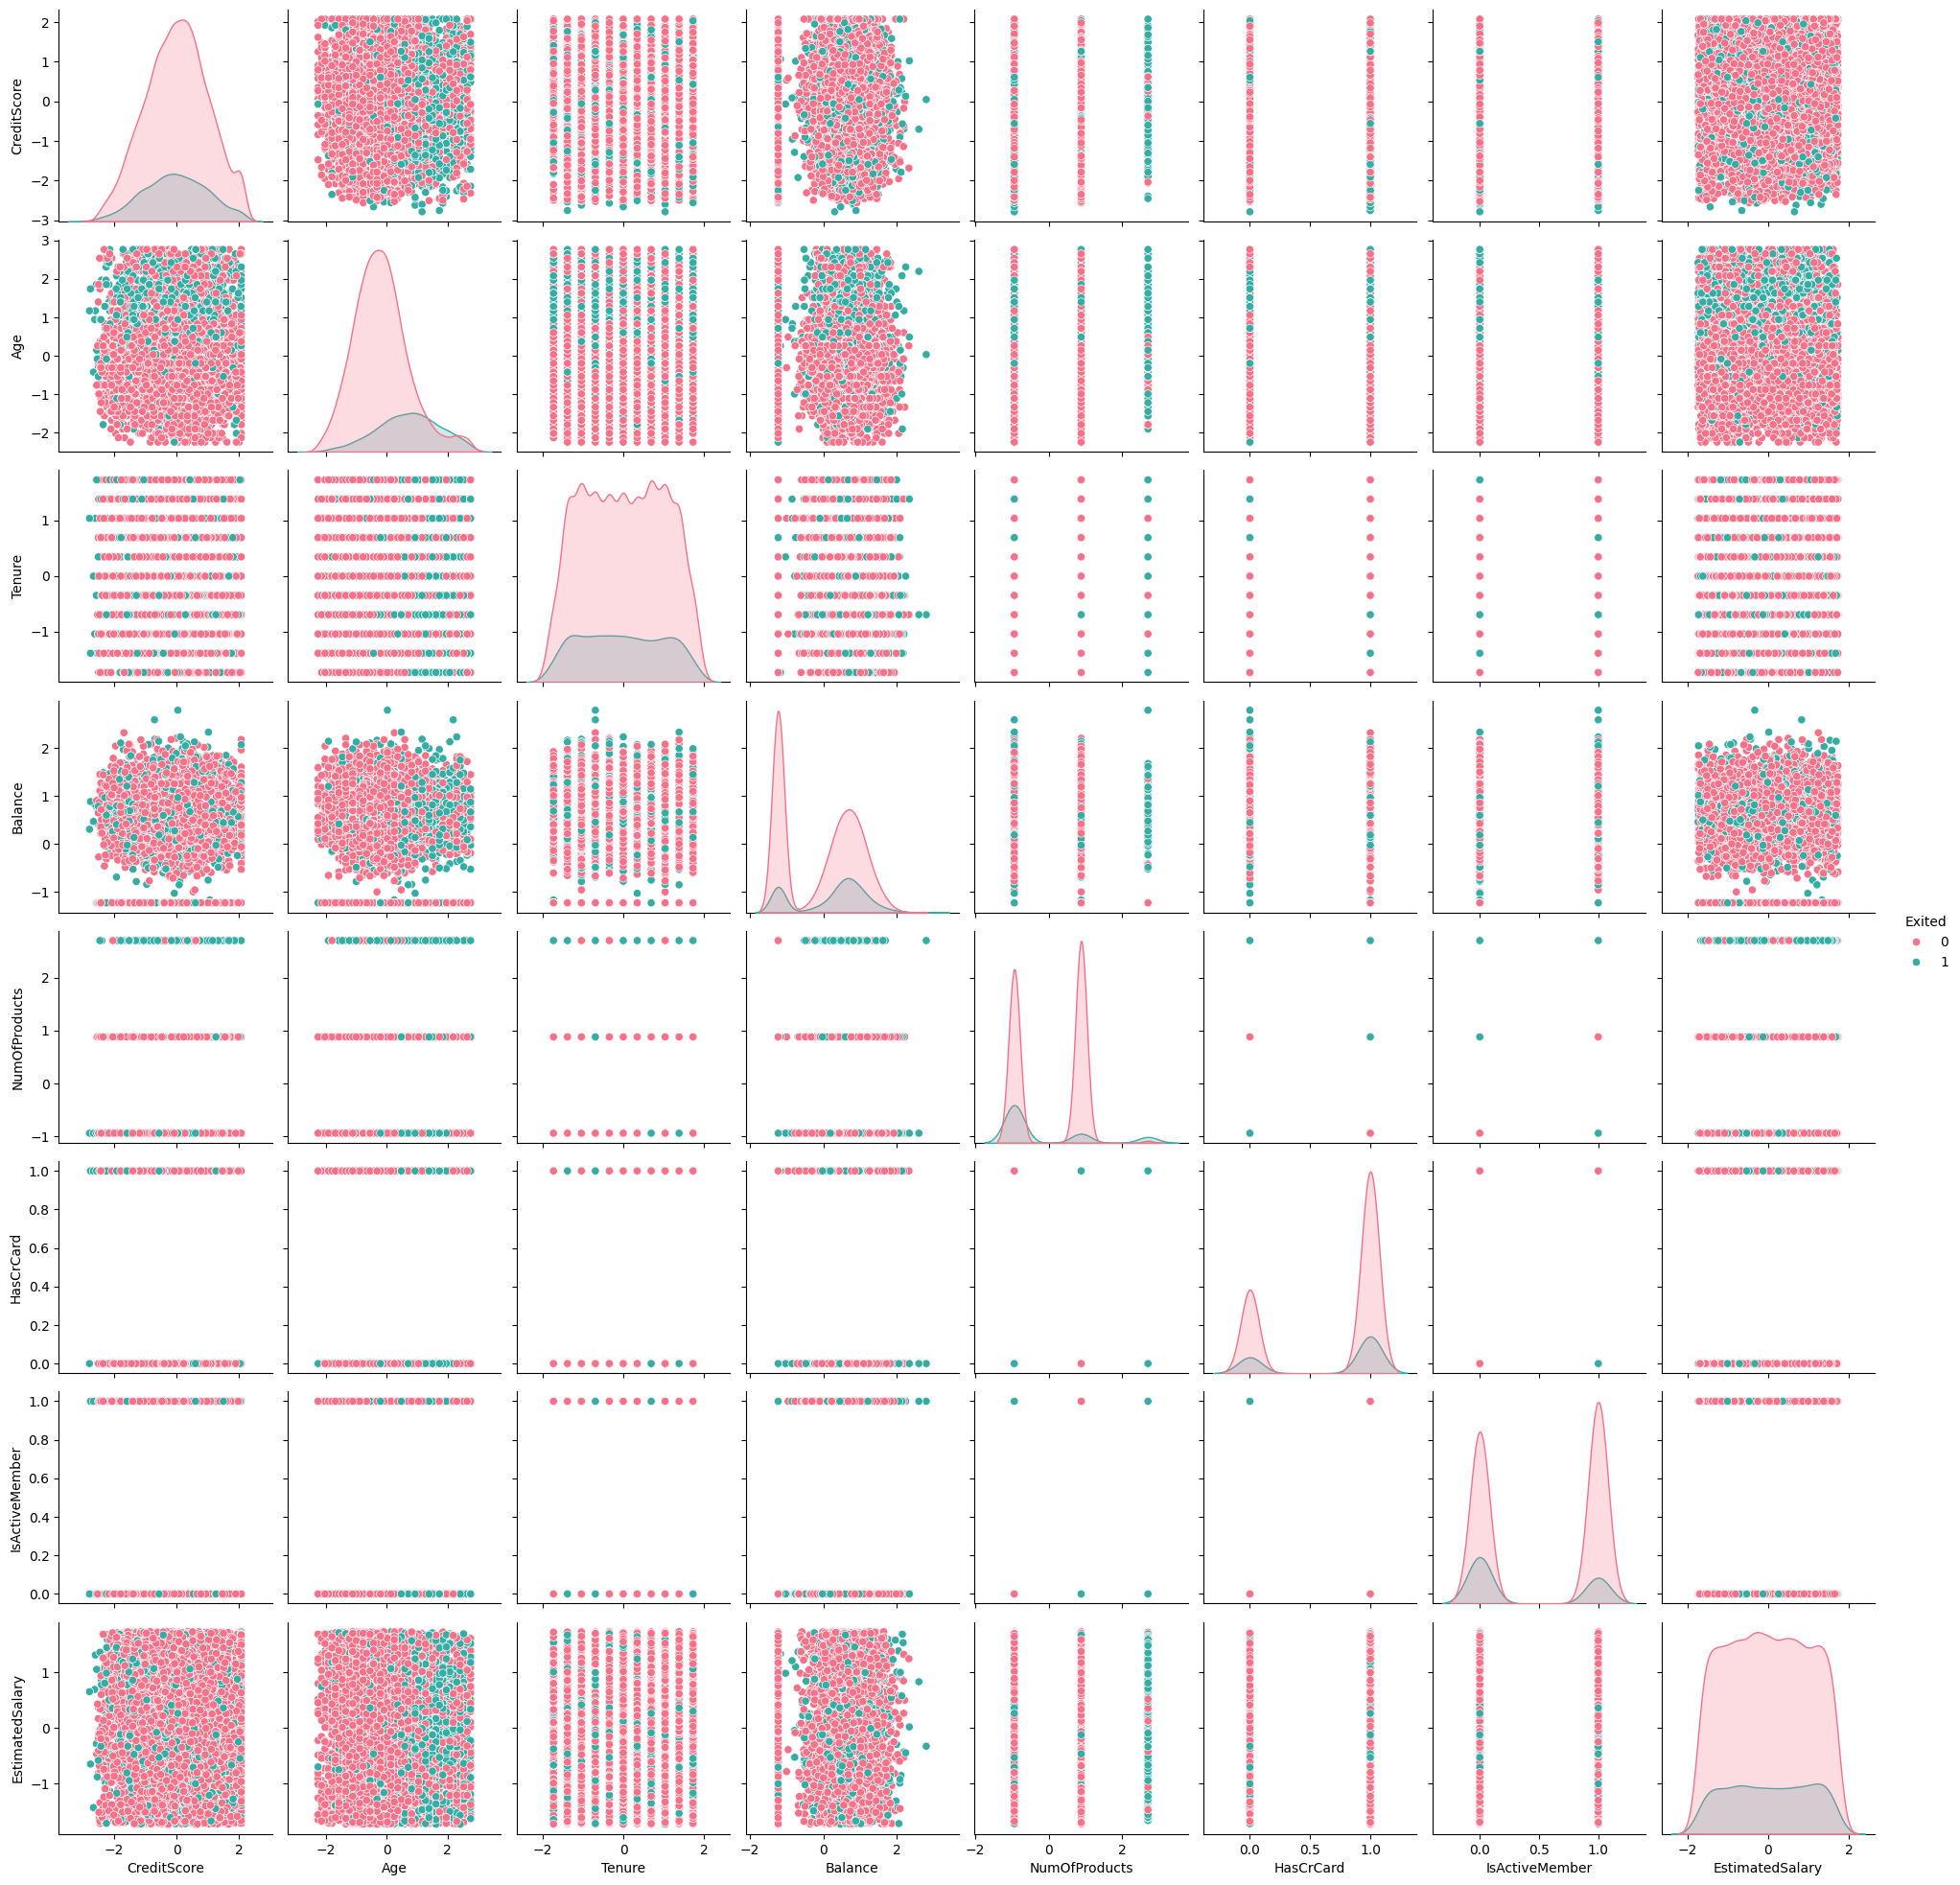

In [178]:
# Pairplot to visualize relationships and distribution with respect to 'Exited' class
sns.pairplot(df, hue='Exited', palette='husl')
plt.show()

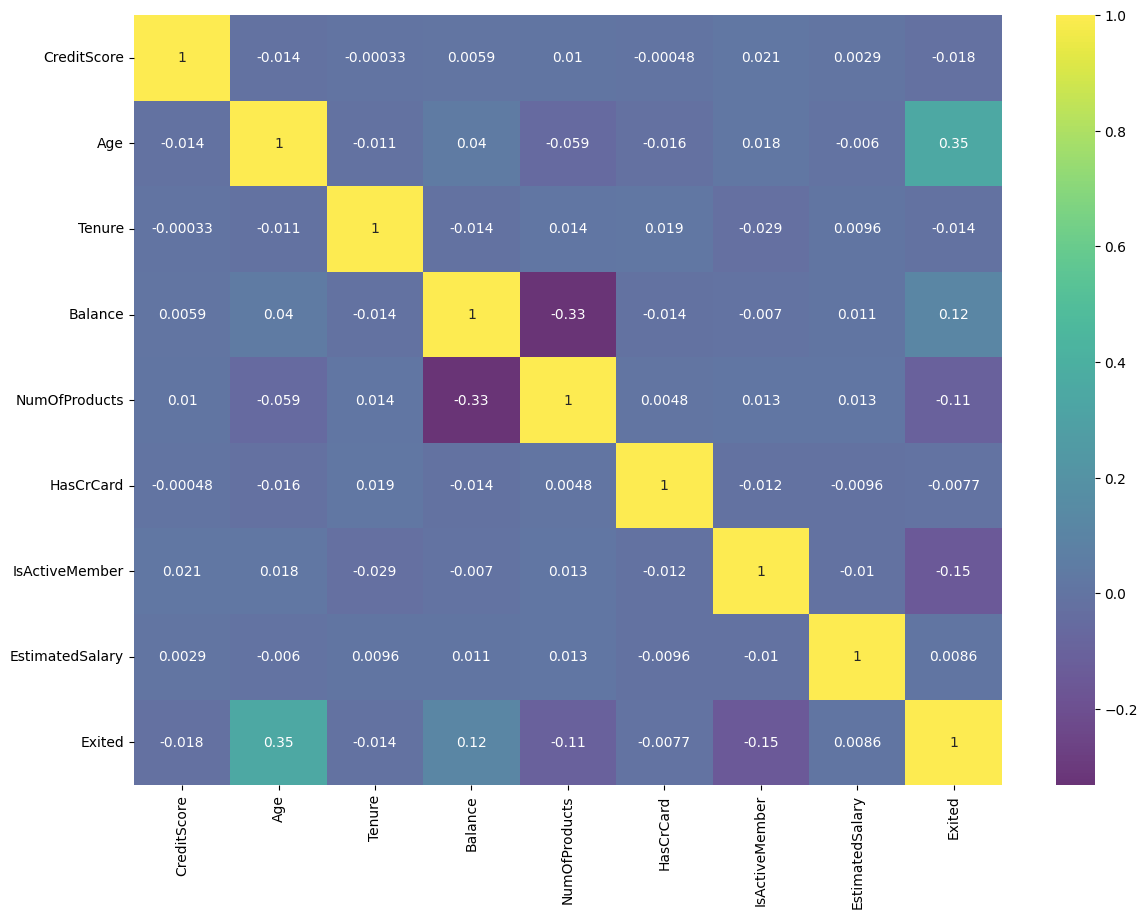

In [179]:
# Correlation matrix heatmap for numerical features
numeric_df = df.select_dtypes(include=['float64', 'int64'])  
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', alpha=0.8)
plt.show()

In [180]:
# Correlation with the target variable ('Exited') for numerical features
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corrwith(df['Exited']).abs().sort_values(ascending=False)

Exited             1.000000
Age                0.353756
IsActiveMember     0.145099
Balance            0.115052
NumOfProducts      0.109205
CreditScore        0.017651
Tenure             0.014092
EstimatedSalary    0.008590
HasCrCard          0.007750
dtype: float64

In [181]:
# One-hot encoding the 'Gender' column
pd.get_dummies(df['Gender']).head()

,Female,Male
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [182]:
# One-hot encoding the 'Gender' column with drop_first
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [183]:
# One-hot encoding the 'Geography' column with drop_first
geo = pd.get_dummies(df['Geography'],drop_first=True)

In [184]:
# Concatenating the one-hot encoded columns to the original DataFrame
df2 = pd.concat([df,gender,geo],axis=1)
df2.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,-0.329808,France,Female,0.485534,-1.044203,-1.224651,-0.938614,1,1,0.021813,1,False,False,False
1,-0.444286,Spain,Female,0.371671,-1.390497,0.118145,-0.938614,0,1,0.216419,0,False,False,True
2,-1.547436,France,Female,0.485534,1.033562,1.333486,2.699489,1,0,0.240567,1,False,False,False
3,0.502758,France,Female,0.143947,-1.390497,-1.224651,0.880438,0,0,-0.108963,0,False,False,False
4,2.074226,Spain,Female,0.599396,-1.044203,0.786324,-0.938614,1,1,-0.365266,0,False,False,True


In [185]:
# Dropping the original 'Geography' and 'Gender' columns after one-hot encoding
df2.drop(['Geography','Gender' ],axis=1, inplace=True)

In [186]:
# Extracting features (X) and target variable (y)
x = df2.drop('Exited',axis=1)
x.columns = x.columns.astype(str)
y = df2['Exited']

In [187]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,-0.329808,0.485534,-1.044203,-1.224651,-0.938614,1,1,0.021813,False,False,False
1,-0.444286,0.371671,-1.390497,0.118145,-0.938614,0,1,0.216419,False,False,True
2,-1.547436,0.485534,1.033562,1.333486,2.699489,1,0,0.240567,False,False,False
3,0.502758,0.143947,-1.390497,-1.224651,0.880438,0,0,-0.108963,False,False,False
4,2.074226,0.599396,-1.044203,0.786324,-0.938614,1,1,-0.365266,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.252067,0.143947,-0.005320,-1.224651,0.880438,1,0,-0.066473,True,False,False
9996,-1.401737,-0.311503,1.726151,-0.305457,-0.938614,1,1,0.027914,True,False,False
9997,0.606829,-0.197641,0.687268,-1.224651,-0.938614,0,1,-1.008495,False,False,False
9998,1.262474,0.485534,-0.697909,-0.021770,0.880438,1,0,-0.125272,True,True,False


In [188]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9568, dtype: int64

In [189]:
# Splitting the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 0, train_size=0.8)

In [190]:
# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=8, min_samples_split=3, min_samples_leaf=4)
decision_tree_model.fit(train_x, train_y)

# Evaluate the model on the training set
train_y_pred_dt = decision_tree_model.predict(train_x)
accuracy_train_dt = accuracy_score(train_y, train_y_pred_dt)

# Evaluate the model on the testing set
test_y_pred_dt = decision_tree_model.predict(test_x)
accuracy_test_dt = accuracy_score(test_y, test_y_pred_dt)

# Print the training and testing accuracies for the Decision Tree model
print(f'Decision Tree Training Accuracy = {accuracy_train_dt:.4f}, Testing Accuracy = {accuracy_test_dt:.4f}')

# Print the classification report for the testing set
classification_rep_test_dt = classification_report(test_y, test_y_pred_dt)
print("\nClassification Report (Testing Set - Decision Tree):\n", classification_rep_test_dt)



Decision Tree Training Accuracy = 0.8758, Testing Accuracy = 0.8595

Classification Report (Testing Set - Decision Tree):
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1571
           1       0.66      0.45      0.53       343

    accuracy                           0.86      1914
   macro avg       0.77      0.70      0.73      1914
weighted avg       0.85      0.86      0.85      1914



In [191]:
# Checking for Overfitting
suggested_k = int(np.sqrt(len(train_x)))
knn_model = KNeighborsClassifier(n_neighbors=suggested_k)

# Training the KNN model on the scaled training data
knn_model.fit(train_x, train_y)

# Evaluating the model on the training set
train_y_pred_knn = knn_model.predict(train_x)
accuracy_train = accuracy_score(train_y, train_y_pred_knn)

# Evaluating the model on the testing set
test_y_pred = knn_model.predict(test_x)
accuracy_test = accuracy_score(test_y, test_y_pred)

# Print the training and testing accuracies for the suggested k
print(f'Suggested k = {suggested_k} Training Accuracy = {accuracy_train:.4f}, Testing Accuracy = {accuracy_test:.4f}')

# Print the classification report for the testing set
classification_rep_test = classification_report(test_y, test_y_pred)
print("\nClassification Report (Testing Set - K-Nearest neighbour):\n", classification_rep_test)

Suggested k = 87 Training Accuracy = 0.8389, Testing Accuracy = 0.8574

Classification Report (Testing Set - K-Nearest neighbour):
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1571
           1       0.78      0.29      0.42       343

    accuracy                           0.86      1914
   macro avg       0.82      0.63      0.67      1914
weighted avg       0.85      0.86      0.83      1914



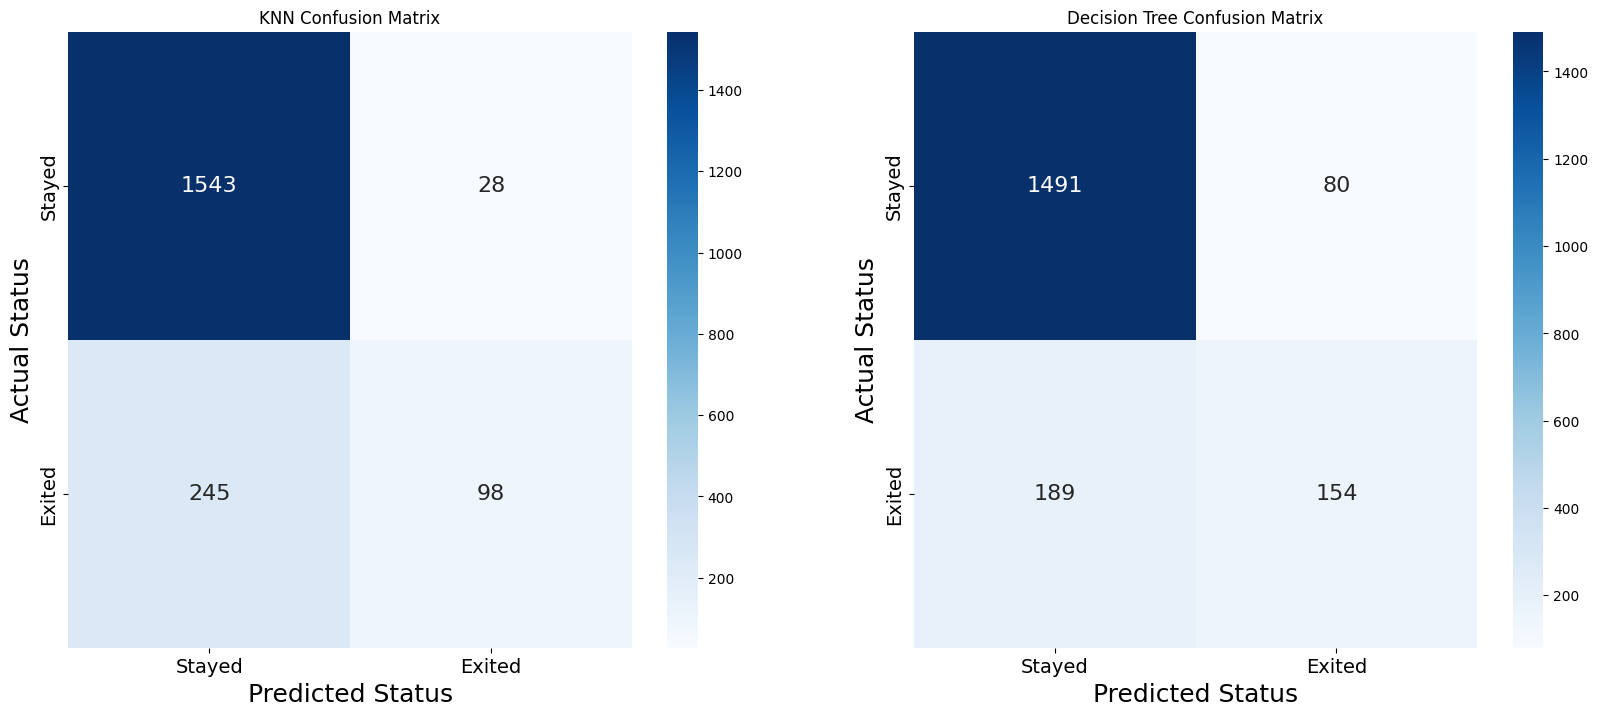

In [192]:
# Generate confusion matrix for KNN model
knn_conf_matrix = confusion_matrix(test_y, test_y_pred)

# Generate confusion matrix for Decision Tree model
dt_conf_matrix = confusion_matrix(test_y, test_y_pred_dt)


fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot confusion matrix for KNN model
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Stayed', 'Exited'], yticklabels=['Stayed', 'Exited'], ax=axs[0], annot_kws={"fontsize": 16})
axs[0].set_title("KNN Confusion Matrix")
axs[0].set_xlabel("Predicted Status", fontsize=18)
axs[0].set_ylabel("Actual Status", fontsize=18)
axs[0].tick_params(axis='both', labelsize=14)  

# Plot confusion matrix for Decision Tree model
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Stayed', 'Exited'], yticklabels=['Stayed', 'Exited'], ax=axs[1], annot_kws={"fontsize": 16})
axs[1].set_title("Decision Tree Confusion Matrix")
axs[1].set_xlabel("Predicted Status", fontsize=18)
axs[1].set_ylabel("Actual Status", fontsize=18)
axs[1].tick_params(axis='both', labelsize=14)  

# Display the plots
plt.show()